<a href="https://colab.research.google.com/github/sushantkumar402/LeNet-CNN-for-CIFAR-10-Classification-Dataset/blob/master/LeNet_Convolutional_Neural_Network_for_CIFAR_10_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

Airplanes
Cars
Birds
Cats
Deer
Dogs
Frogs
Horses
Ships
Trucks
The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.

The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

Images have low resolution (32x32).

Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

##STEP #0: Importing Libraries

In [1]:
#!pip install tensorflow-gpu==2.0.0.alpha0

In [2]:
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
import pickle
from tensorflow.keras import layers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
tf.__version__

'1.15.2'

##STEP #1: Importing the dataset & Normaliszing it

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
# loading the dataset

(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_test.shape

(10000, 1)

## STEP #3: Data Visulization

array([2], dtype=uint8)

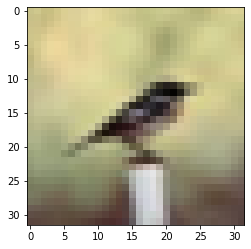

In [11]:
i = random.randint(1, 50000)
plt.imshow(X_train[i]) # showing the image
y_train[i] # showing the label of that images

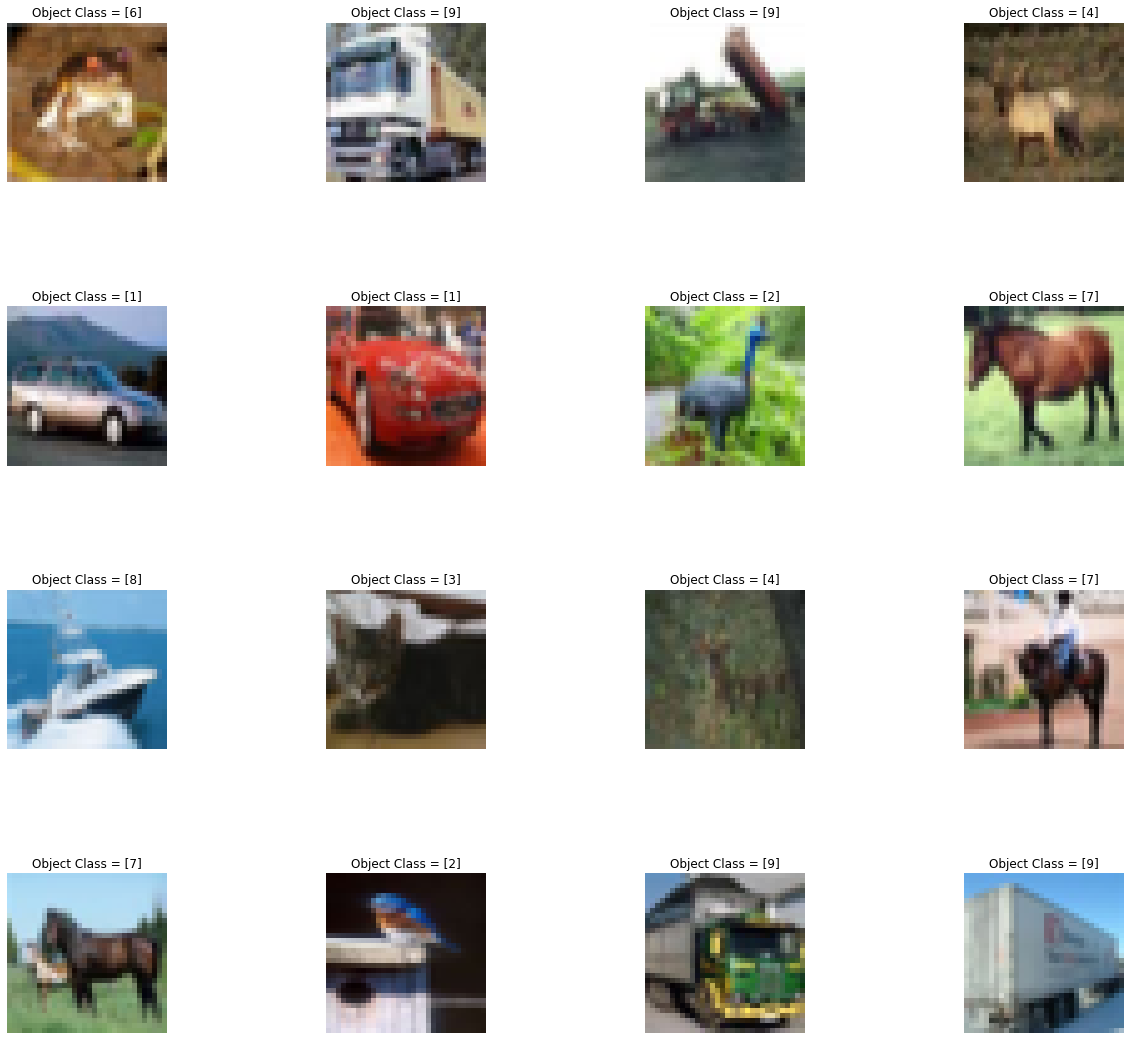

In [12]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_train[i])
    axes[i].set_title("Object Class = {}".format(y_train[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [14]:
#n_training

## STEP #4: Data Preparation

In [15]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
# Coverting the images to gray image (32X32X1) from colored format (32X32X3)
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)

In [18]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [19]:
X_train_gray_norm

array([[[[-0.52083333],
         [-0.65104167],
         [-0.6328125 ],
         ...,
         [ 0.03645833],
         [-0.01302083],
         [-0.0234375 ]],

        [[-0.85416667],
         [-1.        ],
         [-0.93229167],
         ...,
         [-0.30729167],
         [-0.34375   ],
         [-0.30729167]],

        [[-0.81770833],
         [-0.94010417],
         [-0.78125   ],
         ...,
         [-0.34375   ],
         [-0.33854167],
         [-0.41666667]],

        ...,

        [[ 0.234375  ],
         [ 0.01041667],
         [ 0.00260417],
         ...,
         [-0.0546875 ],
         [-0.75520833],
         [-0.72135417]],

        [[ 0.08072917],
         [-0.11979167],
         [-0.0625    ],
         ...,
         [ 0.109375  ],
         [-0.49739583],
         [-0.55729167]],

        [[ 0.13802083],
         [ 0.01822917],
         [ 0.0625    ],
         ...,
         [ 0.40625   ],
         [-0.08072917],
         [-0.25260417]]],


       [[[ 0.34895833],


In [20]:
X_train_gray_norm.shape

(50000, 32, 32, 1)

##STEP #5: Training the Model

In [21]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))
LeNet.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________

In [22]:
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=50, batch_size=500, verbose=1)

Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 152us/sample - loss: 2.2205 - acc: 0.2326
Epoch 2/50
50000/50000 [==============================] - 1s 13us/sample - loss: 1.7896 - acc: 0.3567
Epoch 3/50
50000/50000 [==============================] - 1s 13us/sample - loss: 1.6899 - acc: 0.3990
Epoch 4/50
50000/50000 [==============================] - 1s 13us/sample - loss: 1.6255 - acc: 0.4240
Epoch 5/50
50000/50000 [==============================] - 1s 12us/sample - loss: 1.5754 - acc: 0.4421
Epoch 6/50
50000/50000 [==============================] - 1s 13us/sample - loss: 1.5389 - acc: 0.4542
Epoch 7/50
50000/50000 [==============================] - 1s 12us/sample - loss: 1.5066 - acc: 0.4686
Epoch 8/50
50000/50000 [==============================] - 1s 13us/sample - loss: 1.4754 - acc: 0.4780
Epoch 9/50
50000/50000 [==============================] - 1s 12us/sample - loss: 1.4480 - acc: 0.4882
Epoch 10/50
50000/50000 [==============================] -

##STEP #5: Model Evaluation

In [24]:
score = LeNet.evaluate(X_test_gray_norm, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 1.1094 - acc: 0.6230


In [25]:
print('LeNEt Model accuracy on Test Dataset: {}'.format(score[1]))

LeNEt Model accuracy on Test Dataset: 0.6230000257492065


In [26]:
history.history.keys()

dict_keys(['loss', 'acc'])

In [30]:
accuracy = history.history['acc']
loss = history.history['loss']


In [31]:
epochs = range(len(accuracy)) # we coudl have given the values directly as we alread know the the number of epochs while training the model
epochs

range(0, 50)

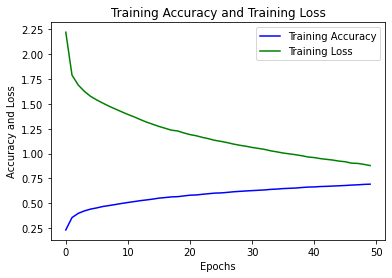

In [32]:
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [33]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

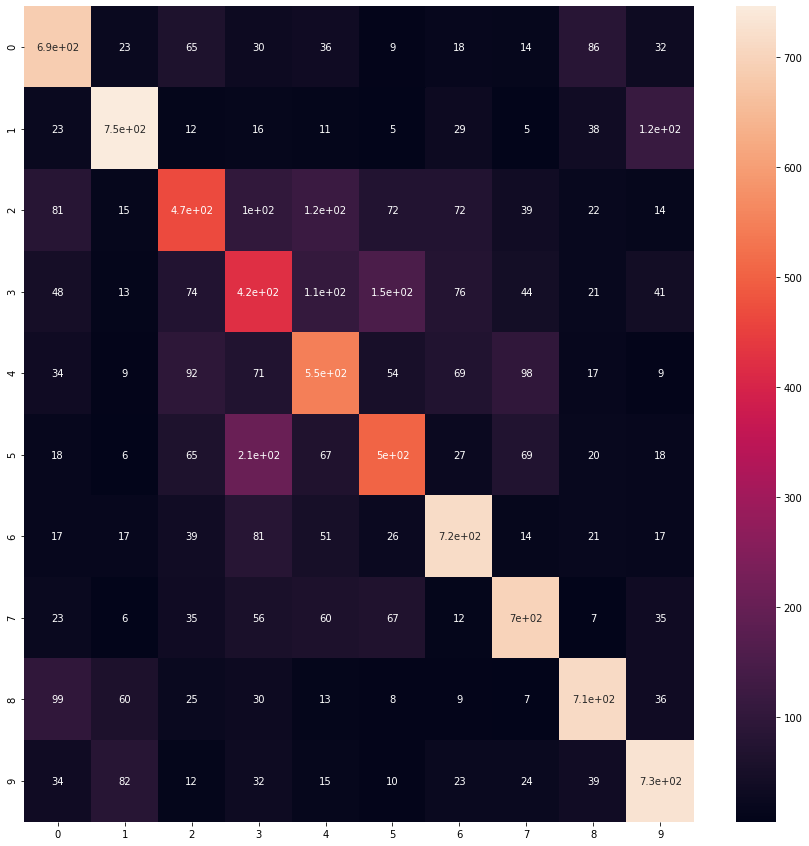

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot = True)

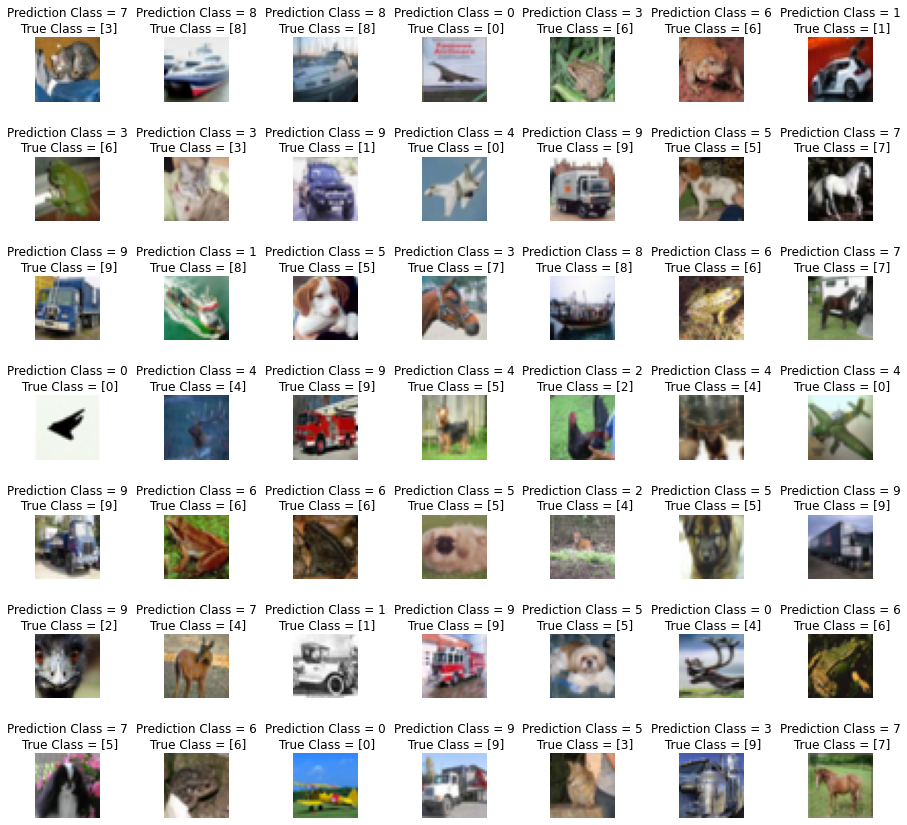

In [35]:
# Image Augementation to generate the new dataset by rotating 90, left, counterclockwise, blurr, shorten, sharpen
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [36]:
# classification report of Model Performance on Testing Data
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.65      0.69      0.67      1000
     Class 1       0.76      0.75      0.75      1000
     Class 2       0.53      0.47      0.49      1000
     Class 3       0.40      0.42      0.41      1000
     Class 4       0.53      0.55      0.54      1000
     Class 5       0.56      0.50      0.53      1000
     Class 6       0.68      0.72      0.70      1000
     Class 7       0.69      0.70      0.69      1000
     Class 8       0.72      0.71      0.72      1000
     Class 9       0.70      0.73      0.71      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

